In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
torre_me = '../../database/torrePozoIzquierdo_JUL_AGO_2004/torreME.txt'

In [67]:
parse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')
df_torre_me = pd.read_csv(torre_me, skiprows=12,  
                          delim_whitespace=True, 
                          header=None, 
                          names=['day', 'time', 'direccion_viento', 'v_h10', 'v_h20', 'v_h40'],
                          parse_dates=[['day', 'time']], 
                          date_parser=parse,
                          index_col=0)

In [68]:
df_torre_me.head(5)

,direccion_viento,v_h10,v_h20,v_h40
day_time,,,,
2004-07-01 00:00:00,55.0,9.3,9.9,9.6
2004-07-01 00:01:00,54.0,8.7,9.4,9.6
2004-07-01 00:02:00,54.0,8.7,9.3,9.8
2004-07-01 00:03:00,53.0,8.8,9.3,9.6
2004-07-01 00:04:00,52.0,9.9,10.4,10.2


## 2) Selección del lag o ventana
### 2.1-) Soft-models

In [69]:
df_vh40 = df_torre_me[['v_h40']]
df_hour_vh40 = df_vh40.resample('H').max()
df_hour_vh40.head(3)

,v_h40
day_time,
2004-07-01 00:00:00,13.6
2004-07-01 01:00:00,13.5
2004-07-01 02:00:00,12.3


In [70]:
lag = pd.DataFrame(index=df_hour_vh40.index)
rolling_mean_dfs = []
rolling_mean_dfs.append(df_hour_vh40)
for freq in [3, 6, 12, 24, 30, 36, 42, 48]:
    df_rolling = df_hour_vh40.rolling(window=freq).mean()
    df_rolling.columns = ['rolling={0}'.format(freq)]
    rolling_mean_dfs.append(df_rolling)

In [71]:
df_lags = pd.concat(rolling_mean_dfs, axis=1)
df_lags.head(2)

,v_h40,rolling=3,rolling=6,rolling=12,rolling=24,rolling=30,rolling=36,rolling=42,rolling=48
day_time,,,,,,,,,
2004-07-01 00:00:00,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-07-01 01:00:00,13.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


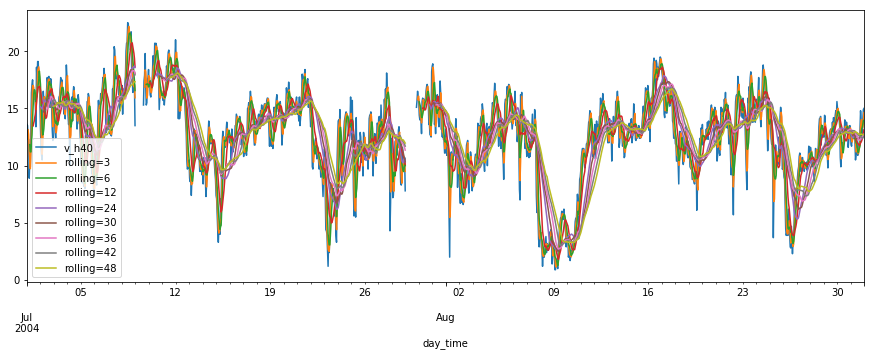

In [72]:
df_lags.plot(figsize=(15,5))

In [73]:
# coeficiente de correlación
df_corr = df_lags.corr()
df_corr

,v_h40,rolling=3,rolling=6,rolling=12,rolling=24,rolling=30,rolling=36,rolling=42,rolling=48
v_h40,1.000000,0.962348,0.910085,0.835358,0.766125,0.738508,0.689804,0.636910,0.592371
rolling=3,0.962348,1.000000,0.967921,0.891798,0.810422,0.783680,0.735451,0.681816,0.633405
rolling=6,0.910085,0.967921,1.000000,0.950603,0.860982,0.833995,0.789537,0.736594,0.685089
rolling=12,0.835358,0.891798,0.950603,1.000000,0.936399,0.906610,0.872595,0.825970,0.774896
rolling=24,0.766125,0.810422,0.860982,0.936399,1.000000,0.987890,0.965375,0.936945,0.901988
rolling=30,0.738508,0.783680,0.833995,0.906610,0.987890,1.000000,0.989978,0.969186,0.941868
rolling=36,0.689804,0.735451,0.789537,0.872595,0.965375,0.989978,1.000000,0.991178,0.971841
rolling=42,0.636910,0.681816,0.736594,0.825970,0.936945,0.969186,0.991178,1.000000,0.992085
rolling=48,0.592371,0.633405,0.685089,0.774896,0.901988,0.941868,0.971841,0.992085,1.000000


In [74]:
ps_corr = df_corr.ix[0,:]

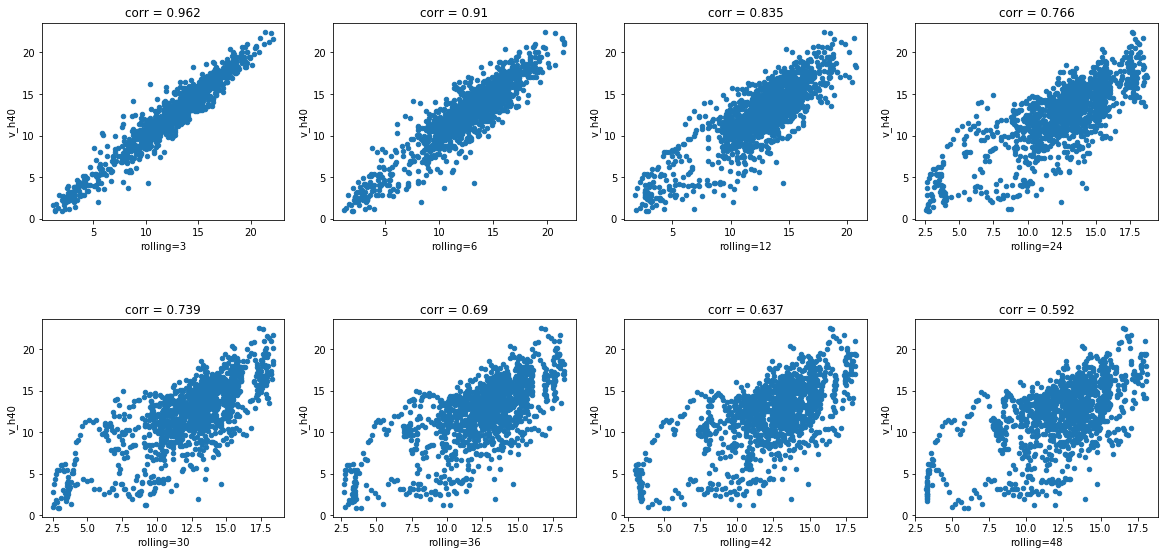

In [75]:
f = plt.figure(figsize=(20,20))
for i, col in enumerate(df_corr.columns[1:]):
    i=i+1
    ax = f.add_subplot(4,4,i)
    f.subplots_adjust(hspace=.5)
    df_lags.plot(ax=ax, kind='scatter', x=col, y='v_h40', 
                 title='corr = {0}'.format(round(ps_corr[i],3)))
#plt.suptitle('Coeficiente de correlación')

Se puede concluir que el tamaño de la ventana debe ser de 3 o 6.